<h1 style="font-family:'poppins'">Linear Regression</h1>
<h2 style="font-family:'poppins'">Author: Nabeel Raza</h2>
<hr>

**Task:** Predict the percentage score of a student based on the no. of study hours.

### Importing and global styling

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Setting the style of plots...
plt.style.use('seaborn-darkgrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

%matplotlib inline

### Reading the data

In [177]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [178]:
data.shape

(25, 2)

In [179]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Representing the data

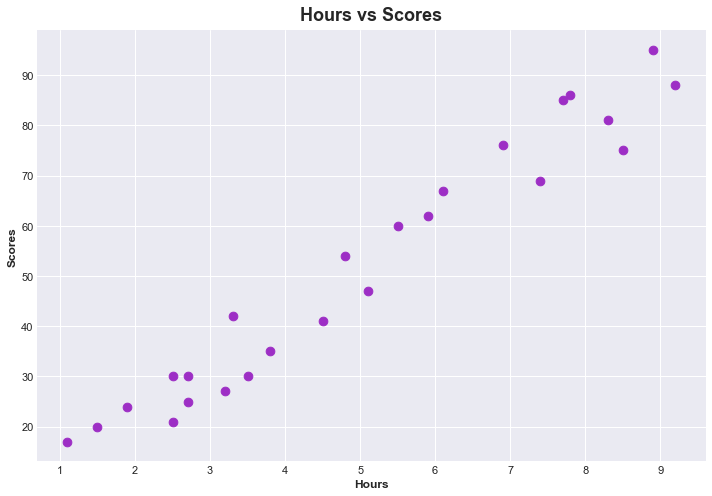

In [180]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Hours'], data['Scores'], s=75, color='#9D2EC5')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

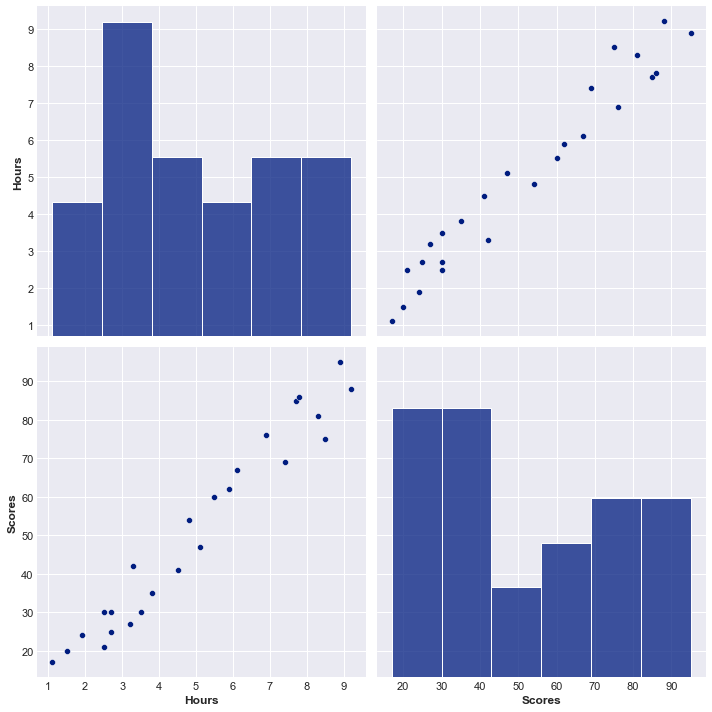

In [181]:
import seaborn as sns

g = sns.pairplot(data)
g.fig.set_size_inches(10,10)

### Preparing the data...

In [182]:
from sklearn.model_selection import train_test_split

X = data[['Hours']]
y = data['Scores'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Training the model

In [183]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [184]:
m = model.coef_
b = model.intercept_
print("slope: ", m)
print("y-Intercept: ", b)

line = m*X + b # y = mx + b

slope:  [9.91065648]
y-Intercept:  2.0181600414346974


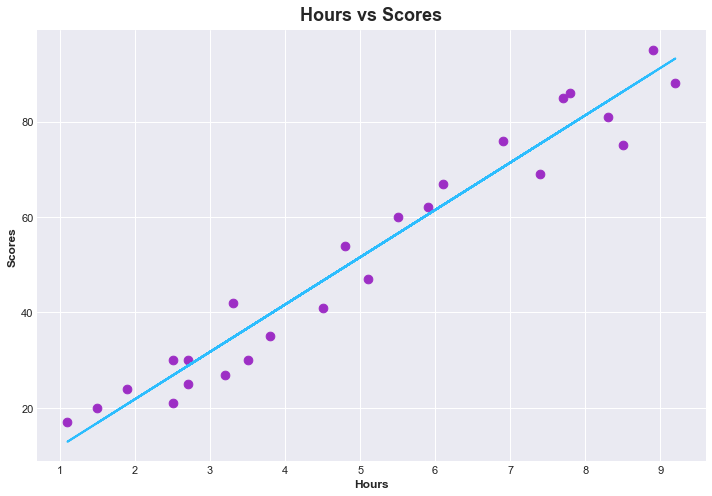

In [185]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Hours'], data['Scores'], s=75, color='#9D2EC5')
plt.plot(X, line, color='#2CBDFE', linewidth=2)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Testing the model

In [186]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({"Original": y_test, "Predicted": predictions})
comparison

,Original,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the Model

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("The MSE is: ", mse)
print("The MAE is: ", mae)

The MSE is:  21.598769307217406
The MAE is:  4.183859899002975


### What will be the predicted score if a student studies for 9.25 hours/day?

In [188]:
score = model.predict([[9.25]])
print("The predicted scores are: ", score[0])

The predicted scores are:  93.69173248737535
